$ pip install plotly==5.1.0

In [60]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline


In [61]:
# import the farmingham data
# 'male':0 = Female; 1 = Male
farmingham_data = pd.read_csv("output_data/framingham.csv")
# identify any null values
farmingham_data.count()
# identify the data type
farmingham_data.dtypes


ID                   int64
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [62]:
# drop any null valules - lets not drop the null values and fill it in with mean
farmingham_data = farmingham_data.dropna(how="any")
print(farmingham_data.count())


ID                 3658
male               3658
age                3658
education          3658
currentSmoker      3658
cigsPerDay         3658
BPMeds             3658
prevalentStroke    3658
prevalentHyp       3658
diabetes           3658
totChol            3658
sysBP              3658
diaBP              3658
BMI                3658
heartRate          3658
glucose            3658
TenYearCHD         3658
dtype: int64


In [63]:


#  convert the someof the floats to integer
farmingham_data.loc[:, "BPMeds"] = farmingham_data.loc[:, "BPMeds"].astype("int")
farmingham_data.loc[:, "education"] = farmingham_data.loc[:, "education"].astype("int")
farmingham_data.loc[:, "cigsPerDay"] = farmingham_data.loc[:, "cigsPerDay"].astype("int")
farmingham_data.loc[:, "totChol"] = farmingham_data.loc[:, "totChol"].astype("int")
farmingham_data.loc[:, "sysBP"] = farmingham_data.loc[:, "sysBP"].astype("int")
farmingham_data.loc[:, "diaBP"] = farmingham_data.loc[:, "diaBP"].astype("int")
farmingham_data.loc[:, "heartRate"] = farmingham_data.loc[:, "heartRate"].astype("int")
farmingham_data.dtypes


ID                   int64
male                 int64
age                  int64
education            int32
currentSmoker        int64
cigsPerDay           int32
BPMeds               int32
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int32
sysBP                int32
diaBP                int32
BMI                float64
heartRate            int32
glucose            float64
TenYearCHD           int64
dtype: object

In [64]:
# rename the column name 'male' to 'Gender' and replace 0,1 to female and male
# replace Diabetes: from 0,1 to negative and positive
# replace TenYearCHD: from 0,1 to negative and positive
# Renamed Column headers

clean_df = farmingham_data.rename(columns = {"male": "Gender","age": "Age","currentSmoker":"Current-Smoker",
                                           "cigsPerDay":"Cigarettes-Per-Day","education":"Education",
                                            "prevalentStroke":"Prevalent-Stroke","prevalentHyp":"Prevalent-Hyp",
                                           "diabetes":"Diabetes","totChol":"Total-Cholesterol",
                                           "sysBP":"Systolic-Blood-Pressure","BPMeds":"Blood-Pressure-Medication","diaBP":"Diastolic-Blood-Pressure",
                                           "heartRate":"Heart-Rate","glucose":"Glucose","TenYearCHD":"Ten-Year-CHD"})
clean_df["Gender"]= clean_df["Gender"].replace(1, "Male")
clean_df["Gender"]= clean_df["Gender"].replace(0, "Female")
clean_df["Ten-Year-CHD"]= clean_df["Ten-Year-CHD"].replace(0, "negative")
clean_df["Ten-Year-CHD"]= clean_df["Ten-Year-CHD"].replace(1, "positive")
clean_df["Diabetes"]= clean_df["Diabetes"].replace(0, "negative")
clean_df["Diabetes"]= clean_df["Diabetes"].replace(1, "positive")
clean_df["Education"]= clean_df["Education"].replace(1, "Some High School")
clean_df["Education"]= clean_df["Education"].replace(2, "High School or GED")
clean_df["Education"]= clean_df["Education"].replace(3, "Some college or Vocational School")
clean_df["Education"]= clean_df["Education"].replace(4, "College")
clean_df["Prevalent-Stroke"]= clean_df["Prevalent-Stroke"].replace(0, "Never had a stroke")
clean_df["Prevalent-Stroke"]= clean_df["Prevalent-Stroke"].replace(1, "Has had a stroke")


clean_df.count()
# find any duplicated data - No duplicates found
clean_df.duplicated()
# Describe the data
clean_df.describe()


In [45]:
clean_df.head(-1)

,ID,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD
0,1,Male,39,College,0,0,0,Never had a stroke,0,negative,195,106,70,26.97,80,77.0,negative
1,2,Female,46,High School or GED,0,0,0,Never had a stroke,0,negative,250,121,81,28.73,95,76.0,negative
2,3,Male,48,Some High School,1,20,0,Never had a stroke,0,negative,245,127,80,25.34,75,70.0,negative
3,4,Female,61,Some college or Vocational School,1,30,0,Never had a stroke,1,negative,225,150,95,28.58,65,103.0,positive
4,5,Female,46,Some college or Vocational School,1,23,0,Never had a stroke,0,negative,285,130,84,23.10,85,85.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,4233,Male,68,Some High School,0,0,0,Never had a stroke,1,negative,176,168,97,23.14,60,79.0,positive
4233,4234,Male,50,Some High School,1,1,0,Never had a stroke,1,negative,313,179,92,25.97,66,86.0,positive
4234,4235,Male,51,Some college or Vocational School,1,43,0,Never had a stroke,0,negative,207,126,80,19.71,65,68.0,negative
4237,4238,Female,52,High School or GED,0,0,0,Never had a stroke,0,negative,269,133,83,21.47,80,107.0,negative


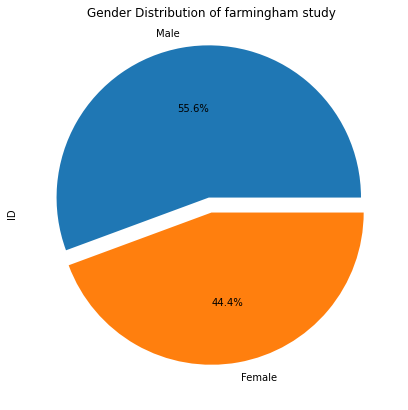

In [46]:
# enerate a pie plot showing female versus male distribution in dataset
gender_data = pd.DataFrame(clean_df.groupby(['Gender']).count()).reset_index()
gender_data = gender_data[['Gender', 'ID']]
# pie plot
color = ["blue", "pink"]
explode = (0.1, 0)
lables= ['Male', 'Female']
gender_data.plot(kind='pie', y = 'ID', labels=lables, autopct='%1.1f%%', 
                 title="Gender Distribution of farmingham study", legend = False, figsize=(11,7), explode=explode)

plt.show()

,ID,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD,Count_10YCHD
0,1,Male,39,College,0,0,0,Never had a stroke,0,negative,195,106,70,26.97,80,77.0,negative,1
1,2,Female,46,High School or GED,0,0,0,Never had a stroke,0,negative,250,121,81,28.73,95,76.0,negative,1
2,3,Male,48,Some High School,1,20,0,Never had a stroke,0,negative,245,127,80,25.34,75,70.0,negative,1
3,4,Female,61,Some college or Vocational School,1,30,0,Never had a stroke,1,negative,225,150,95,28.58,65,103.0,positive,1
4,5,Female,46,Some college or Vocational School,1,23,0,Never had a stroke,0,negative,285,130,84,23.10,85,85.0,negative,1


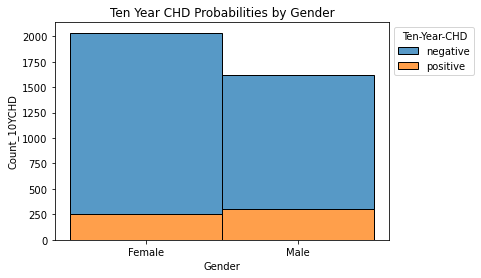

In [47]:
# insert new column with value 1 so we can get count of male ad female
clean_df['Count_10YCHD'] = 1
# create pivot table to count how many female and male are TenYearCHD positive and negative and graph it
gender_pv_df = clean_df.pivot_table('Count_10YCHD', ['Gender', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Gender
# sns.barplot(x="Gender", y="Count_10YCHD", hue="Ten-Year-CHD", data=clean_pv_df)
# stacked barplot - i need to add percentage of total gender vs positive and negative
gender_bar = sns.histplot(gender_pv_df, x="Gender", weights="Count_10YCHD", hue="Ten-Year-CHD", multiple='stack')
gender_bar.set_ylabel('Count_10YCHD')
legend = gender_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))
gender_bar.set_title('Ten Year CHD Probabilities by Gender')
clean_df.head()


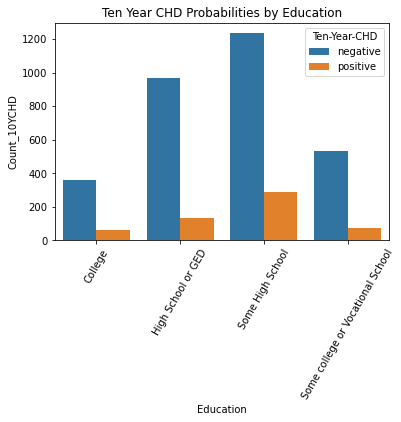

In [48]:
# let's check if education is relevant - do step 53 and 54 to create pivot table and graph it.
# create pivot table to show education vs Ten Year CHD in the dataset

education_pv_df = clean_df.pivot_table('Count_10YCHD', ['Education', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by Education - add % of people had lower education
education_bar = sns.barplot(x="Education", y="Count_10YCHD", hue="Ten-Year-CHD", data=education_pv_df)
education_bar.set_title('Ten Year CHD Probabilities by Education')
plt.setp(education_bar.get_xticklabels(), rotation=60)
legend = education_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))

In [49]:
# let's check which age group and gender smoke more.
# to do this, we need to create the agegroup range bins.follow steps 53 and 54 again and graph it
clean_df['Age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 32, 70, 69], dtype=int64)

In [50]:
# lets set the Ages range from max age 32 to 70 to create groups
clean_df['AgeGroup'] = pd.cut(x=clean_df['Age'], bins = [30 , 39, 49, 59, 70],
                              labels=['30-39 years', '40-49 years', '50-59 years', '60-70years'])
clean_df.head()

,ID,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,Ten-Year-CHD,Count_10YCHD,AgeGroup
0,1,Male,39,College,0,0,0,Never had a stroke,0,negative,195,106,70,26.97,80,77.0,negative,1,30-39 years
1,2,Female,46,High School or GED,0,0,0,Never had a stroke,0,negative,250,121,81,28.73,95,76.0,negative,1,40-49 years
2,3,Male,48,Some High School,1,20,0,Never had a stroke,0,negative,245,127,80,25.34,75,70.0,negative,1,40-49 years
3,4,Female,61,Some college or Vocational School,1,30,0,Never had a stroke,1,negative,225,150,95,28.58,65,103.0,positive,1,60-70years
4,5,Female,46,Some college or Vocational School,1,23,0,Never had a stroke,0,negative,285,130,84,23.10,85,85.0,negative,1,40-49 years


[None, None, None, None, None, None, None, None]

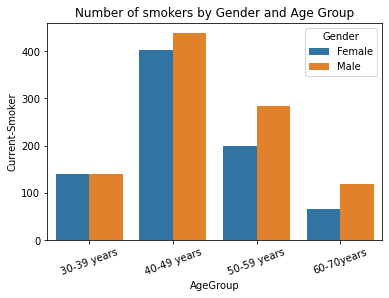

In [51]:
# create pivot table to show smokers vs Ten-Year-CHD
smoker_pv_df = clean_df.pivot_table('Current-Smoker', ['Gender', 'AgeGroup'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by current smoker
smoker_bar = sns.barplot(x="AgeGroup", y="Current-Smoker", hue="Gender", data=smoker_pv_df)
smoker_bar.set_title('Number of smokers by Gender and Age Group')
plt.setp(smoker_bar.get_xticklabels(), rotation=20)


,Diabetes,Ten-Year-CHD,Count_10YCHD
0,negative,negative,3037
1,negative,positive,522
2,positive,negative,64
3,positive,positive,35


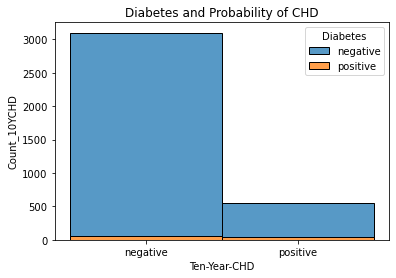

In [52]:
# let's check relationship between all the health conditions in the incidence of heart disease.
# show Diabetes vs Ten Year CHD
diabetes_pv_df = clean_df.pivot_table('Count_10YCHD', ['Diabetes', 'Ten-Year-CHD'], aggfunc="sum").reset_index()
# plot the bar graph to show probabilities by diabetes vs Ten Year CHD
# diabetes_bar = sns.barplot(x="Ten-Year-CHD", y="Count_10YCHD", hue="Diabetes", data=diabetes_pv_df)
# diabetes_bar.set_title('Diabetes and Probability of CHD')
# plt.setp(diabetes_bar.get_xticklabels(), rotation=20)

diabetes_bar = sns.histplot(diabetes_pv_df, x="Ten-Year-CHD", weights="Count_10YCHD", hue="Diabetes", multiple='stack')
diabetes_bar.set_ylabel('Count_10YCHD')
legend = diabetes_bar.get_legend()
legend.set_bbox_to_anchor((1, 1))
diabetes_bar.set_title('Diabetes and Probability of CHD')
diabetes_pv_df

Text(0.5, 1.0, 'Total Cholesterol by age group')

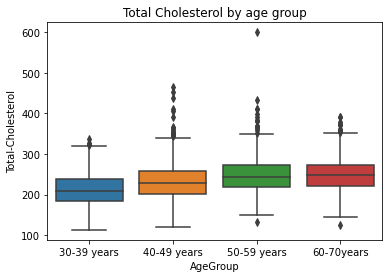

In [54]:
# same plot as cell 177
chol_plot = sns.boxplot(x="AgeGroup", y="Total-Cholesterol", data=clean_df)
chol_plot.set_title('Total Cholesterol by age group')

Text(0.5, 1.0, 'Total BMI by age group')

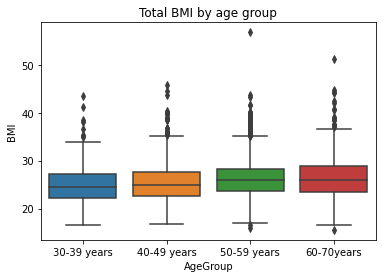

In [56]:
# plot BMI by age group
bmi_plot = sns.boxplot(x="AgeGroup", y="BMI", data=clean_df)
bmi_plot.set_title('Total BMI by age group')

Text(0.5, 1.0, 'Total Glucose by age group')

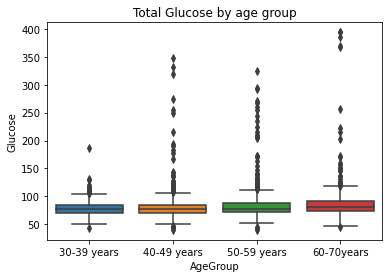

In [57]:
# plot Glucose by age group
glucose_plot = sns.boxplot(x="AgeGroup", y="Glucose", data=clean_df)
glucose_plot.set_title('Total Glucose by age group')

Text(0.5, 1.0, 'Heart Rate by age group')

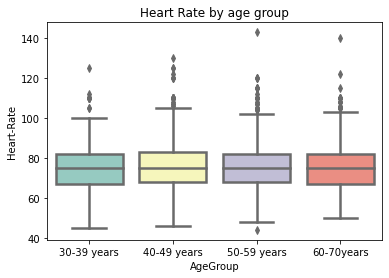

In [58]:
# plot Heart rate by age group
heart_plot = sns.boxplot(x="AgeGroup", y="Heart-Rate",data=clean_df,palette="Set3",linewidth=2.5)
heart_plot.set_title('Heart Rate by age group')

Text(0.5, 1.0, 'Heart Rate by age group')

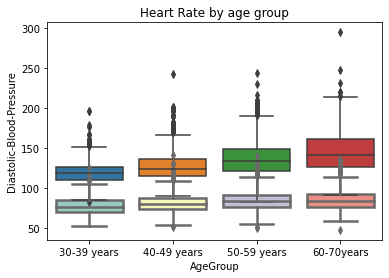

In [59]:
# plot Blood Pressure by age group
bprate_plot1 = sns.boxplot(x="AgeGroup", y="Systolic-Blood-Pressure",data=clean_df)
bprate_plot2 = sns.boxplot(x="AgeGroup", y="Diastolic-Blood-Pressure",data=clean_df,palette="Set3",linewidth=2.5)
bprate_plot1.set_title('Heart Rate by age group')